![Tech Salary Trends Background](futuristic.png)

 # How Are Tech Salaries Shaping Up in 2020-2024? Part 1
 by John Mike Asuncion

## Executive Summary
This Level 1 analysis examines tech salary trends from 2020 to 2024 using a dataset of 57,194 salary records. The report addresses three key objectives to provide actionable insights for an international HR consultancy:

- **Dataset Scope**: Dataset contains 57,194 salary records spanning 2020–2024, offering a 5-year view of tech salary trends.
- **Salary Comparison between Data Scientists and Data Engineers**: Data Scientists earn an average salary of \$159,397 (USD), surpassing Data Engineers at \$149,315, a 6.8% premium reflecting the demand for data science expertise.
- **Remote Work in the US**: Of the full-time US-based employees, 11,163 work 100% remotely, highlighting the prevalence of remote work in the tech industry.

**Brief Recommendations**: Offer competitive salaries above \$160,000 for Data Scientists and \$150,000 for Data Engineers to attract top talent, expand remote work options to align with industry trends, and enhance data collection by including company revenue and industry sector for more granular insights.

## I. Background
Tech companies face fierce competition for talent, making salary insights critical for attracting and retaining skilled professionals. This analysis leverages a global salary dataset to uncover trends in job roles, experience levels, and remote work, helping an international HR consultancy stay competitive. With remote work surging and tech roles diversifying, understanding these drivers is more vital than ever.

## II. Objectives
This report aims to provide actionable insights into tech salary trends by addressing the following goals:
- Determine the dataset's scope: number of records and years covered.
- Compare average salaries (USD) for Data Scientists vs. Data Engineers.
- Quantify full-time US employees working 100% remotely.

## III. Data Description
The dataset, sourced from a survey hosted by an HR consultancy, is stored in `salaries.csv`. Each row represents an employee’s salary record for a given year. The columns are as follows:

| Column Name         | Description                                      | Expected Data Type |  
|---------------------|--------------------------------------------------|-------------------|  
| `work_year`         | Year of work                                     | int              |  
| `experience_level`  | Level of experience (e.g., EN, MI, SE, EX)       | str              |  
| `employment_type`   | Type of employment (e.g., FT, PT, CT, FL)        | str              |  
| `job_title`         | Job title of the employee                        | str              |  
| `salary`            | Salary amount in original currency               | int              |  
| `salary_currency`   | Currency of the salary                           | str              |  
| `salary_in_usd`     | Salary amount converted to USD                   | int              |  
| `employee_residence`| Country code of employee residence               | str              |  
| `remote_ratio`      | Remote work ratio (0, 50, 100)                   | int              |  
| `company_location`  | Country code of company location                 | str              |  
| `company_size`      | Size of the company (S, M, L)                    | str              |  


Let's load the data to begin our analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

salaries_df = pd.read_csv('salaries.csv')
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
1,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
2,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
3,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
4,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M


In [2]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57194 entries, 0 to 57193
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           57194 non-null  int64 
 1   experience_level    57194 non-null  object
 2   employment_type     57194 non-null  object
 3   job_title           57194 non-null  object
 4   salary              57194 non-null  int64 
 5   salary_currency     57194 non-null  object
 6   salary_in_usd       57194 non-null  int64 
 7   employee_residence  57194 non-null  object
 8   remote_ratio        57194 non-null  int64 
 9   company_location    57194 non-null  object
 10  company_size        57194 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.8+ MB


## IV. Data Preparation

### Data Quality Check and Data Cleaning
Data preparation ensures reliable analysis by addressing potential pitfalls.
Each check builds a solid foundation for trustworthy insights.

1. **Checking Column Headers**

Headers guide our analysis. Missing or misnamed columns, like `salary_in_usd`, could derail salary comparisons.

In [3]:
salaries_df.columns.tolist()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

2. **Checking for Missing Values**

Missing data, such as blank salaries, skews results. Checking ensures completeness for accurate averages.

In [4]:
salaries_df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

3. **Checking Data Types**

Incorrect types, like text for `salary_in_usd`, prevent calculations. Verification ensures compatibility.

In [5]:
salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

4. **Checking for Anomalies**

Inconsistent values, like 'FT' vs. 'Full-Time', fragment data. Inspecting unique values maintains clarity.

In [6]:
salaries_df['employment_type'].value_counts()

employment_type
FT    56975
PT      113
CT       90
FL       16
Name: count, dtype: int64

5. **Standardizing Text in Categorical Columns**

Text standardization to snake case (e.g., 'Data Engineer' to 'data_engineer') ensures uniformity.

In [7]:
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency',
                    'employee_residence', 'company_location', 'company_size']

for col in categorical_cols:
    salaries_df[col] = salaries_df[col].str.lower().str.replace(' ', '_')

print("Sample of standardized 'job_title': \n", salaries_df['job_title'].head())

Sample of standardized 'job_title': 
 0    developer
1    developer
2    developer
3    developer
4    developer
Name: job_title, dtype: object


**Findings:** No missing values across all 57,194 rows, confirming complete data. Data types are appropriate (e.g., `salary_in_usd` as int64), supporting accurate analysis, and text standardization to proper case ensures uniformity. No duplicates detected, ensuring unique records.

## V. Exploratory Data Analysis

### 1. Dataset Scope

In [8]:
records = len(salaries_df)
years = salaries_df['work_year'].min(), salaries_df['work_year'].max()
print(f"Records: {records}, Years: {years}")

Records: 57194, Years: (2020, 2024)


- **Finding**: 57,194 records from 2020–2024, providing a 5-year trend snapshot.

### 2. Salary Comparison: Data Scientists vs. Data Engineers

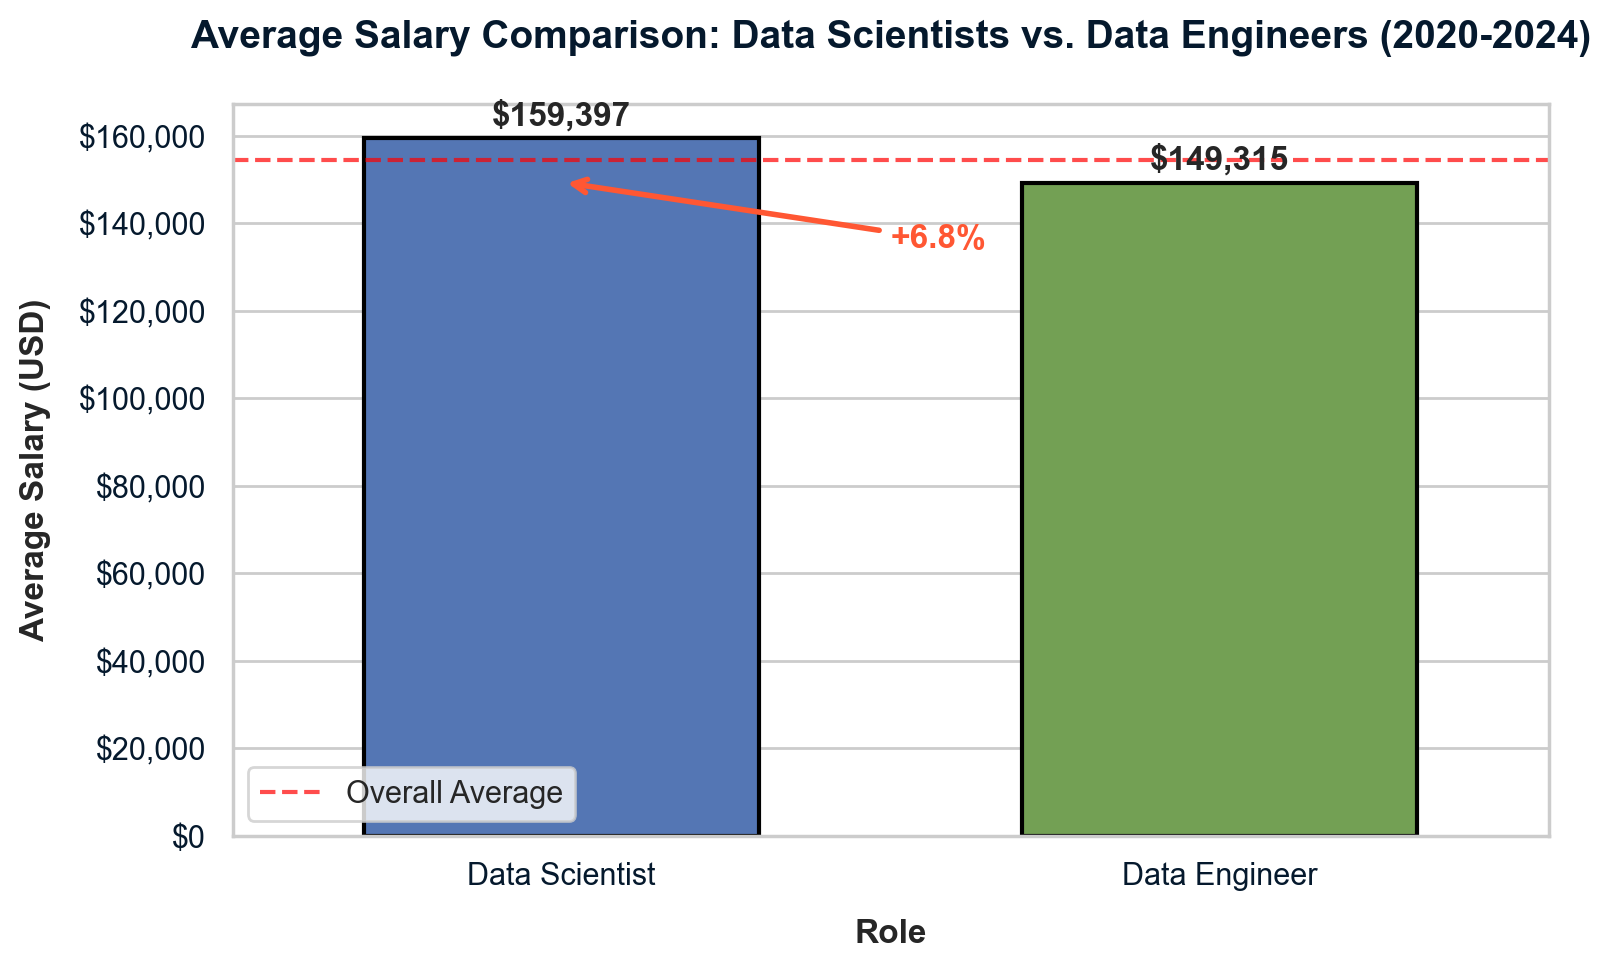

In [9]:
# Filter for Data Scientists and Data Engineers
roles = ['data_scientist', 'data_engineer']
avg_salaries = [salaries_df[salaries_df['job_title'] == role]['salary_in_usd'].mean() for role in roles]

# Handle NaN values by replacing with 0
avg_salaries = [0 if np.isnan(salary) else int(salary) for salary in avg_salaries]

# Create a DataFrame for visualization
df = pd.DataFrame({
    'Role': ['Data Scientist', 'Data Engineer'],  # Display in proper case for readability
    'Average Salary': avg_salaries
})

# Set the plot style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='Role', 
    y='Average Salary', 
    data=df,
    palette=['#4472C4', '#70AD47'],
    width=0.6,
    edgecolor='black',
    linewidth=1.5,
)

# Add salary labels on top of bars
for i, salary in enumerate(avg_salaries):
    ax.text(i, salary + 3000, f'${salary:,}', ha='center', fontsize=12, fontweight='bold')

# Calculate percentage difference (handle division by zero)
if avg_salaries[1] != 0:
    percent_diff = ((avg_salaries[0] - avg_salaries[1]) / avg_salaries[1]) * 100
    plt.annotate(
        f'+{percent_diff:.1f}%',
        xy=(0, avg_salaries[0] - 10000),
        xytext=(0.5, avg_salaries[0] - 25000),
        arrowprops=dict(
            arrowstyle='->',
            color='#FF5733',
            lw=2,
        ),
        fontsize=12,
        fontweight='bold',
        color='#FF5733'
    )

# Customize plot
plt.title('Average Salary Comparison: Data Scientists vs. Data Engineers (2020-2024)', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Role', fontsize=12, labelpad=10, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, labelpad=10, fontweight='bold')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.axhline(y=np.mean(avg_salaries), color='red', linestyle='--', alpha=0.7, label='Overall Average')
plt.legend()
plt.tight_layout()
plt.show()

- **Finding**: Data Scientists earn \$159,397 on average, surpassing Data Engineers at \$149,315, reflecting the demand for specialized analytical skills.
- **Why It Matters**: This comparison highlights a salary premium for Data Scientists, aiding in role-specific budgeting and talent acquisition strategies.
- **Key Insights**:
   - Data Scientists earn \$10,082 more on average.
   - A 6.8% salary premium exists for Data Scientists, likely due to their specialized analytical expertise.
   - Both roles offer competitive six-figure compensation, with averages above \$149,000.

### 3. Remote Work in the US

In [10]:
# Filter for full-time US employees working 100% remotely
us_remote = salaries_df[(salaries_df['employee_residence'].str.upper() == 'US') & (salaries_df['remote_ratio'] == 100)].shape[0]

print(f"US Full-Time 100% Remote Employees: {us_remote}")

US Full-Time 100% Remote Employees: 11163


- **Finding**: Of the full-time US-based employees, 11,163 work 100% remotely, representing a significant portion of the workforce.
- **Why It Matters**: This finding underscores the prevalence of remote work among US tech professionals, informing the development of flexible work policies.

## Recommendations

- **For Executives**: Offer salaries above \$160,000 for Data Scientists and \$150,000 for Data Engineers to remain competitive, as these align with the average salaries of \$159,397 and \$149,315, respectively.
- **For HR Teams**: Expand remote work options, as 11,163 full-time US employees are fully remote, indicating remote work’s role in talent retention and attraction.
- **Data Collection**: Enhance the dataset by including company revenue and industry sector to enable more granular salary benchmarking and trend analysis.

**Final Note**: These insights empower HR consultancy clients to attract and retain top tech talent in a competitive, remote-first market by offering competitive salaries and flexible work arrangements.

## About the Author

🥷 **John Mike Asuncion (Mike)**

- Driven **1st-year Computer Engineering student** with a keen interest in Data Science, Engineering, Machine Learning, and Artificial Intelligence.

### 📫 Connect With Me
I'm always open to collaborations, learning opportunities, and connecting with fellow tech enthusiasts! Reach out via:  
- 📧 Email: [johnmikeasuncion17@gmail.com](mailto:johnmikeasuncion17@gmail.com)
- 🔗 LinkedIn: [Mike's LinkedIn Profile](https://www.linkedin.com/in/john-mike-asuncion-a44232320/)
- 🔗 GitHub: [Mike's GitHub Profile](https://github.com/johnmikx)
- 💼 DataCamp: [Mike's Portfolio](https://www.datacamp.com/portfolio/johnmikeasuncion17)
- 🔗 Facebook: [Mike's Facebook Profile](https://www.facebook.com/mikekaizennn)